In [3]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter

def NaluDiv(x,W,eps):
    i = np.log(np.absolute(x) + eps)
    j = np.matmul(W,i)
    k = np.exp(j)
    return k

def sigmoid(x):
        return 1 / (1 + np.exp(-x))

def sig(G,x):
    return sigmoid(G*x)



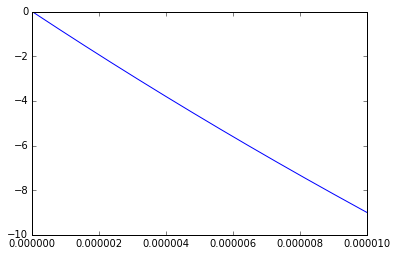

In [5]:
x = np.array([1e-2, 1e-4])
epsilon = np.linspace(1e-10,1e-5,1000)
W = np.array([1, -1])

val = []
y = x[0]/x[1]
for i in range(np.size(epsilon)):
    val.append(NaluDiv(x,W,epsilon[i]))

plt.plot(epsilon,val-y)

# Numerator vs Divisor

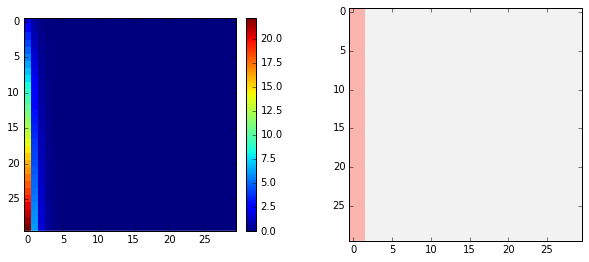

(29, 0)
10.0/1e-08 = 1000000000.0
Epsilon = 2.220446049250313e-16
Nalu: 999999977.7955426
maxErr = 22.20445740222931
Threshold = 1e-08,  Within Threshold: 840.0


In [63]:
epsilon = 2**(-52) # machine precision roughly equals 1.11 * 1e-16
thresh = 1e-8
W = np.array([1, -1]) # division

X1 = np.linspace(1,1e1,30) # numerator
X2 = np.logspace(-8,0,30) # denominator


abserr = np.zeros((np.size(X1),np.size(X2)))
NaluMat = np.zeros((np.size(X1),np.size(X2)))
TrueMat = np.zeros((np.size(X1),np.size(X2)))
ThreshMat = np.zeros((np.size(X1),np.size(X2)))

for i in range(np.size(X1)):
    for j in range(np.size(X2)):
        x = np.array([X1[i],X2[j]])
        NaluMat[i,j] = NaluDiv(x,W,epsilon)
        TrueMat[i,j] = x[0]/x[1]
        if TrueMat[i,j]*(1-thresh) <= NaluMat[i,j] <= TrueMat[i,j]*(1+thresh):
            ThreshMat[i,j] = 1
        
abserr = np.absolute(NaluMat - TrueMat)
T1 = ThreshMat

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.subplots_adjust(wspace=0.4)
plt.imshow(abserr,interpolation='none')
plt.colorbar(fraction=0.046, pad=0.04)


plt.subplot(122)
plt.imshow(ThreshMat, interpolation='none', cmap='Pastel1')
plt.show()

ind = np.unravel_index(np.argmax(abserr, axis=None), abserr.shape)
x = np.array([X1[ind[0]],X2[ind[1]]])
maxerr = np.max(abserr)

print(ind)
print(str(x[0]) + "/" + str(x[1]) + " = " + str(x[0]/x[1]))
print("Epsilon = " + str(epsilon))
print("Nalu: " + str(NaluDiv(x,W,epsilon)))
print("maxErr = " + str(maxerr))
print("Threshold = " + str(thresh) + ",  " + "Within Threshold: " + str(np.sum(ThreshMat)))

# We see large absolute errors for small numbers divided by large numbers
# However, all of the errors are less than 5% away from the true value
# It is not until the denominator is almost equal to the epsilon value that this breaks down
#     this could happen when sampling from [0,1] or [-1,1] but the chance is low
# Idea: the error we find is actually mostly caused by epsilon. When epsilon is insignificant
#     compared to the numerator but significant compared to the denominator
#     we see a larger error. 

#  Epsilon vs Denominator

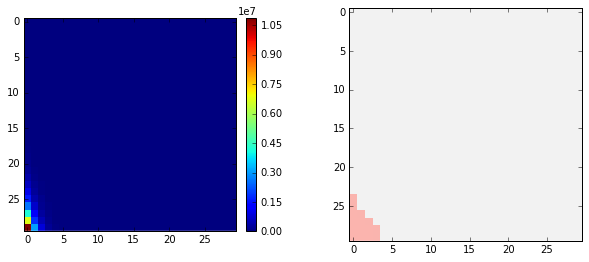

(29, 0)
10.0/1e-08 = 1000000000.0
Epsilon = 1.1000000000000001e-10
Nalu: 989119683.4925807
maxErr = 10880316.507419348
Threshold = 0.001,  Within Threshold: 885.0


In [64]:
thresh = 0.001
W = np.array([1, -1])

X1 = 1e1
X2 = np.logspace(-8,0,30) # denominator
epsilon = 2**(-52) # machine precision roughly equals 1.11 * 1e-16
epsilon = 1.1*np.logspace(-16,-10,30)

abserr = np.zeros((np.size(epsilon),np.size(X2)))
NaluMat = np.zeros((np.size(epsilon),np.size(X2)))
TrueMat = np.zeros((np.size(epsilon),np.size(X2)))
ThreshMat = np.zeros((np.size(epsilon),np.size(X2)))

for i in range(np.size(epsilon)):
    for j in range(np.size(X2)):
        x = np.array([X1,X2[j]])
        NaluMat[i,j] = NaluDiv(x,W,epsilon[i])
        TrueMat[i,j] = x[0]/x[1]
        if TrueMat[i,j]*(1-thresh) <= NaluMat[i,j] <= TrueMat[i,j]*(1+thresh):
            ThreshMat[i,j] = 1
        
abserr = np.absolute(NaluMat - TrueMat)
T2 = ThreshMat

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.subplots_adjust(wspace=0.4)
plt.imshow(abserr,interpolation='none')
plt.colorbar(fraction=0.046, pad=0.04)


plt.subplot(122)
plt.imshow(ThreshMat, interpolation='none', cmap='Pastel1')
plt.show()

ind = np.unravel_index(np.argmax(abserr, axis=None), abserr.shape)
x = np.array([X1,X2[ind[1]]])
maxerr = np.max(abserr)

print(ind)
print(str(x[0]) + "/" + str(x[1]) + " = " + str(x[0]/x[1]))
print("Epsilon = " + str(epsilon[ind[0]]))
print("Nalu: " + str(NaluDiv(x,W,epsilon[ind[0]])))
print("maxErr = " + str(maxerr))
print("Threshold = " + str(thresh) + ",  " + "Within Threshold: " + str(np.sum(ThreshMat)))




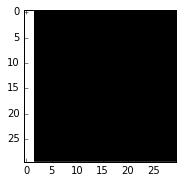

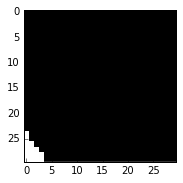

array([[0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1

In [58]:
plt.subplot(121)
plt.imshow(T1, interpolation='none', cmap='binary')
plt.show()

plt.subplot(122)
plt.imshow(T2, interpolation='none', cmap='binary')
plt.show()

T1

In [43]:
T2

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1